In [1]:
pip install pillow



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
from PIL import Image, UnidentifiedImageError
import shutil

# Function to check if an image is valid
def is_valid_image(file_path):
    try:
        with Image.open(file_path) as img:
            img.verify()  # Verify the image integrity
        return True
    except (IOError, UnidentifiedImageError):
        return False

# Paths
source_folder = r"C:\Users\jasha\Downloads\yelp_photos\photos"  # Update with your source folder
destination_folder = r"C:\Users\jasha\Downloads\yelp_photos\shortstorage"  # Update with your destination folder

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Collect valid image paths, limiting to the first 2000 images
valid_image_paths = []
for file_name in os.listdir(source_folder):
    source_path = os.path.join(source_folder, file_name)
    if file_name.endswith(('.jpg', '.png')) and is_valid_image(source_path):
        valid_image_paths.append(source_path)
    if len(valid_image_paths) >= 2000:  # Limit to 2000 valid images
        break

# Display how many valid images were collected
print(f"Collected {len(valid_image_paths)} valid images.")

# Copy the valid images to the destination folder
for image_path in valid_image_paths:
    # Extract the filename from the path
    file_name = os.path.basename(image_path)
    # Define the destination path
    destination_path = os.path.join(destination_folder, file_name)
    # Copy the image to the destination folder
    shutil.copy(image_path, destination_path)

print(f"Saved {len(valid_image_paths)} valid images to {destination_folder}.")


Collected 2000 valid images.
Saved 2000 valid images to C:\Users\jasha\Downloads\yelp_photos\shortstorage.


In [3]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.utils import save_image
from PIL import Image

# Set device and create output directory
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Create output directory for generated images
os.makedirs("generated_images", exist_ok=True)

Using device: cpu


In [4]:
# Hyperparameters
lr = 0.0002
batch_size = 64
image_size = 64
channels_img = 3  # RGB images
z_dim = 100
num_epochs = 10
features_gen = 64
features_disc = 64

In [5]:
class YelpDataset(Dataset):
    def __init__(self, image_folder, transform=None):
        self.image_folder = image_folder
        self.transform = transform
        # Filter out invalid images during initialization
        self.image_files = []
        for f in os.listdir(image_folder):
            if f.endswith(('.jpg', '.jpeg', '.png')):
                try:
                    img_path = os.path.join(image_folder, f)
                    with Image.open(img_path) as img:
                        img.verify() 
                    self.image_files.append(f)
                except Exception as e:
                    print(f"Skipping corrupted image {f}: {str(e)}")
        print(f"Found {len(self.image_files)} valid images")
        
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        while True:
            try:
                img_path = os.path.join(self.image_folder, self.image_files[idx])
                image = Image.open(img_path).convert('RGB')
                if self.transform:
                    image = self.transform(image)
                return image
            except Exception as e:
                print(f"Error loading image {self.image_files[idx]}: {str(e)}")
                
                idx = (idx + 1) % len(self.image_files)

In [6]:
 # Step2: Path to dataset folder
dataset = datasets.ImageFolder(root='photos', transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2)

NameError: name 'datasets' is not defined

In [7]:
from torchvision import datasets


In [8]:
from torchvision import datasets
from torch.utils.data import DataLoader

# Step 2: Path to dataset folder
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Example transformation
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root='photos', transform=transform)  # Update 'photos' with your actual path
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'photos'

In [9]:
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms

# Step 2: Path to dataset folder
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Example transformation
    transforms.ToTensor()
])

# Update the root path with your actual folder path
dataset_path = r"C:\Users\jasha\Downloads\yelp_photos\shortstorage"

dataset = datasets.ImageFolder(root=dataset_path, transform=transform)  # Corrected path
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2)

print(f"Dataset loaded successfully. Number of images: {len(dataset)}")


FileNotFoundError: Couldn't find any class folder in C:\Users\jasha\Downloads\yelp_photos\shortstorage.

In [10]:
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms
import os
import shutil

# Organize dataset
source_folder = r"C:\Users\jasha\Downloads\yelp_photos\shortstorage"
destination_folder = r"C:\Users\jasha\Downloads\yelp_photos\shortstorage\default_class"

# Create subdirectory for images
os.makedirs(destination_folder, exist_ok=True)
for file_name in os.listdir(source_folder):
    source_path = os.path.join(source_folder, file_name)
    if file_name.endswith(('.jpg', '.png')):  # Include only valid image formats
        shutil.move(source_path, os.path.join(destination_folder, file_name))

# Define transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load dataset
dataset = datasets.ImageFolder(root=r"C:\Users\jasha\Downloads\yelp_photos\shortstorage", transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2)

print(f"Dataset loaded succe


SyntaxError: unterminated f-string literal (detected at line 28) (2388770279.py, line 28)

In [11]:
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms
import os
import shutil

# Organize dataset
source_folder = r"C:\Users\jasha\Downloads\yelp_photos\shortstorage"
destination_folder = r"C:\Users\jasha\Downloads\yelp_photos\shortstorage\default_class"

# Create subdirectory for images
os.makedirs(destination_folder, exist_ok=True)
for file_name in os.listdir(source_folder):
    source_path = os.path.join(source_folder, file_name)
    if file_name.endswith(('.jpg', '.png')):  # Include only valid image formats
        shutil.move(source_path, os.path.join(destination_folder, file_name))

# Define transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load dataset
dataset = datasets.ImageFolder(root=r"C:\Users\jasha\Downloads\yelp_photos\shortstorage", transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2)

print(f"Dataset loaded successfully. Number of images: {len(dataset)}")


Dataset loaded successfully. Number of images: 2000


In [12]:
### MODEL
##########################


class Reshape(nn.Module):
    def __init__(self, *args):
        super().__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)


class Trim(nn.Module):
    def __init__(self, *args):
        super().__init__()

    def forward(self, x):
        return x[:, :, :128, :128]


class VAE(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = nn.Sequential(
                nn.Conv2d(3, 32, stride=2, kernel_size=3, bias=False, padding=1),
                nn.BatchNorm2d(32),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                #
                nn.Conv2d(32, 64, stride=2, kernel_size=3, bias=False, padding=1),
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                #
                nn.Conv2d(64, 64, stride=2, kernel_size=3, bias=False, padding=1),
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                #
                nn.Conv2d(64, 64, stride=2, kernel_size=3, bias=False, padding=1),
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                #
                nn.Flatten(),
        )    
        
        self.z_mean = torch.nn.Linear(4096, 200)
        self.z_log_var = torch.nn.Linear(4096, 200)
        
        self.decoder = nn.Sequential(
                torch.nn.Linear(200, 4096),
                Reshape(-1, 64, 8, 8),
                #
                nn.ConvTranspose2d(64, 64, stride=2, kernel_size=3),
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                #
                nn.ConvTranspose2d(64, 64, stride=2, kernel_size=3, padding=1),
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                #
                nn.ConvTranspose2d(64, 32, stride=2, kernel_size=3, padding=1),
                nn.BatchNorm2d(32),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                #
                nn.ConvTranspose2d(32, 3, stride=2, kernel_size=3, padding=1),
                #
                Trim(),  # 3x129x129 -> 3x128x128
                nn.Sigmoid()
                )


    def encoding_fn(self, x):
        x = self.encoder(x)
        z_mean, z_log_var = self.z_mean(x), self.z_log_var(x)
        encoded = self.reparameterize(z_mean, z_log_var)
        return encoded

        
    def reparameterize(self, z_mu, z_log_var):
        eps = torch.randn(z_mu.size(0), z_mu.size(1)).to(z_mu.get_device())
        z = z_mu + eps * torch.exp(z_log_var/2.) 
        return z
        
    def forward(self, x):
        x = self.encoder(x)
        z_mean, z_log_var = self.z_mean(x), self.z_log_var(x)
        encoded = self.reparameterize(z_mean, z_log_var)
        decoded = self.decoder(encoded)
        return encoded, z_mean, z_log_var, decoded

In [13]:
import random
import numpy as np
import torch

def set_all_seeds(seed):
    """
    Sets random seeds for reproducibility.
    """
    random.seed(seed)  # Python random module
    np.random.seed(seed)  # NumPy random module
    torch.manual_seed(seed)  # PyTorch CPU
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)  # PyTorch GPU
    torch.backends.cudnn.deterministic = True  # Ensure deterministic results
    torch.backends.cudnn.benchmark = False


In [14]:
RANDOM_SEED = 42  # Example seed value
set_all_seeds(RANDOM_SEED)


In [15]:
import random
import numpy as np
import torch

# Define the function
def set_all_seeds(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set the seed
RANDOM_SEED = 42
set_all_seeds(RANDOM_SEED)

# Verify
print("Random seed set successfully.")


Random seed set successfully.


In [16]:
DEVICE = torch.device("cpu")  # Set device to CPU
set_all_seeds(42)  # Set random seed for reproducibility

model = VAE().to(DEVICE)  # Initialize and move model to device
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Define optimizer


In [17]:
import torch
import torch.nn as nn

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, stride=2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, stride=2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, stride=2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )
        
        # Adjust input size based on encoder output
        self.z_mean = nn.Linear(1024, 200)  # Match the flattened output
        self.z_log_var = nn.Linear(1024, 200)

        self.decoder_input = nn.Linear(200, 1024)
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (128, 8, 8)),  # Match decoder input
            nn.ConvTranspose2d(128, 64, stride=2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, stride=2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, stride=2, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x = self.encoder(x)
        print(f"Shape before Linear: {x.shape}")  # Debugging statement
        mu = self.z_mean(x)
        log_var = self.z_log_var(x)
        z = self.reparameterize(mu, log_var)
        x = self.decoder_input(z)
        x = self.decoder(x)
        return z, mu, log_var, x


# Instantiate and test the VAE
DEVICE = torch.device("cpu")  # Set device to CPU
vae = VAE().to(DEVICE)

# Test with dummy input
input_data = torch.randn(2, 3, 64, 64).to(DEVICE)  # Batch of 2 images (3 channels, 64x64 size)
output = vae(input_data)  # Forward pass


Shape before Linear: torch.Size([2, 8192])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x8192 and 1024x200)

In [18]:
import torch
import torch.nn as nn

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, stride=2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, stride=2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, stride=2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )
        
        # Manually set the flattened size to 8192 based on the encoder output
        self.z_mean = nn.Linear(8192, 200)
        self.z_log_var = nn.Linear(8192, 200)

        self.decoder_input = nn.Linear(200, 8192)
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (128, 8, 8)),  # Adjust to match decoder input
            nn.ConvTranspose2d(128, 64, stride=2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, stride=2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, stride=2, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x = self.encoder(x)
        print(f"Shape after encoder: {x.shape}")  # Debugging statement
        mu = self.z_mean(x)
        log_var = self.z_log_var(x)
        z = self.reparameterize(mu, log_var)
        x = self.decoder_input(z)
        x = self.decoder(x)
        return z, mu, log_var, x

# Instantiate and test the VAE
DEVICE = torch.device("cpu")  # Set device to CPU
vae = VAE().to(DEVICE)

# Test with dummy input
input_data = torch.randn(2, 3, 64, 64).to(DEVICE)  # Batch of 2 images (3 channels, 64x64 size)
z, mu, log_var, reconstructed = vae(input_data)  # Forward pass
print(f"Reconstructed shape: {reconstructed.shape}")


Shape after encoder: torch.Size([2, 8192])
Reconstructed shape: torch.Size([2, 3, 57, 57])


In [19]:
import torch
import torch.nn as nn

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, stride=2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, stride=2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, stride=2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )
        
        # Manually set the flattened size to 8192 based on the encoder output
        self.z_mean = nn.Linear(8192, 200)
        self.z_log_var = nn.Linear(8192, 200)

        self.decoder_input = nn.Linear(200, 8192)
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (128, 8, 8)),  # Adjust to match decoder input
            nn.ConvTranspose2d(128, 64, stride=2, kernel_size=4, padding=1),  # Output: 16x16
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, stride=2, kernel_size=4, padding=1),  # Output: 32x32
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, stride=2, kernel_size=4, padding=1),   # Output: 64x64
            nn.Sigmoid()
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x = self.encoder(x)
        print(f"Shape after encoder: {x.shape}")  # Debugging statement
        mu = self.z_mean(x)
        log_var = self.z_log_var(x)
        z = self.reparameterize(mu, log_var)
        x = self.decoder_input(z)
        x = self.decoder(x)
        return z, mu, log_var, x


# Instantiate and test the VAE
DEVICE = torch.device("cpu")  # Set device to CPU
vae = VAE().to(DEVICE)

# Test with dummy input
input_data = torch.randn(2, 3, 64, 64).to(DEVICE)  # Batch of 2 images (3 channels, 64x64 size)
z, mu, log_var, reconstructed = vae(input_data)  # Forward pass
print(f"Reconstructed shape: {reconstructed.shape}")


Shape after encoder: torch.Size([2, 8192])
Reconstructed shape: torch.Size([2, 3, 64, 64])


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset

# Subset Dataset
subset_size = 2000  # Limit dataset to 10,000 samples
train_subset = Subset(dataset, range(int(0.8 * subset_size)))
valid_subset = Subset(dataset, range(int(0.8 * subset_size), subset_size))

# Optimized DataLoader
batch_size = 256  # Larger batch size for fewer iterations
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_loader = DataLoader(valid_subset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# Hyperparameters
NUM_EPOCHS = 1
LEARNING_RATE = 0.005
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize VAE and Optimizer
vae = VAE().to(DEVICE)
optimizer = optim.Adam(vae.parameters(), lr=LEARNING_RATE)
recon_loss_fn = nn.MSELoss()

# Training Loop
print("Starting Training...")
for epoch in range(NUM_EPOCHS):
    vae.train()
    train_loss = 0

    for batch_idx, real in enumerate(train_loader):
        real = real.to(DEVICE)
        optimizer.zero_grad()
        
        z, mu, log_var, reconstructed = vae(real)
        recon_loss = recon_loss_fn(reconstructed, real)
        kl_loss = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp()) / real.size(0)
        loss = recon_loss + kl_loss
        
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        if batch_idx % 10 == 0:
            print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Batch [{batch_idx}/{len(train_loader)}], Loss: {loss:.4f}")

    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}] completed. Avg Loss: {train_loss / len(train_loader):.4f}")

print("Training finished!")


Starting Training...


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000014F03093240>
Traceback (most recent call last):
  File "c:\Users\jasha\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "c:\Users\jasha\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py", line 1568, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "c:\Users\jasha\AppData\Local\Programs\Python\Python312\Lib\multiprocessing\process.py", line 149, in join
    res = self._popen.wait(timeout)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jasha\AppData\Local\Programs\Python\Python312\Lib\multiprocessing\popen_spawn_win32.py", line 112, in wait
    res = _winapi.WaitForSingleObject(int(self._handle), msecs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt: 


AttributeError: 'list' object has no attribute 'to'

In [21]:
# Training
print("Starting Training...")
for epoch in range(num_epochs):
    for batch_idx, real in enumerate(loader):
        real = real.to(device)
        batch_size = real.shape[0]
        
        # Train Discriminator
        noise = torch.randn(batch_size, z_dim, 1, 1).to(device)
        fake = gen(noise)
        
        # Real images
        disc_real = disc(real).reshape(-1)
        loss_disc_real = criterion(disc_real, torch.ones_like(disc_real))
        
        # Fake images
        disc_fake = disc(fake.detach()).reshape(-1)
        loss_disc_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
        
        # Total discriminator loss
        loss_disc = (loss_disc_real + loss_disc_fake) / 2
        disc.zero_grad()
        loss_disc.backward()
        opt_disc.step()
        
        # Train Generator
        output = disc(fake).reshape(-1)
        loss_gen = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        loss_gen.backward()
        opt_gen.step()
        
        # Print losses oc
        if batch_idx % 100 == 0:
            print(
                f"Epoch [{epoch}/{num_epochs}] Batch [{batch_idx}/{len(loader)}] "
                f"Loss D: {loss_disc:.4f}, Loss G: {loss_gen:.4f}"
            )

print("Training finished!")

# Generate images after training is complete
print("Generating images...")
gen.eval()  # Set generator to evaluation mode
with torch.no_grad():
    for i in range(5):  # Generate 5 different sets of images
        noise = torch.randn(16, z_dim, 1, 1).to(device)  
        fake = gen(noise)
        save_image(fake, f"generated_images/final_generated_set_{i+1}.png", normalize=True, nrow=4)
print("Image generation completed!")

Starting Training...


NameError: name 'loader' is not defined

In [22]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim

# Device
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformation
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Dataset and DataLoader
dataset_path = r"C:\Users\jasha\Downloads\yelp_photos\shortstorage"  # Correct path
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)

# Model (Assuming you have defined VAE)
vae = VAE().to(DEVICE)

# Optimizer and loss
optimizer = optim.Adam(vae.parameters(), lr=0.001)
recon_loss_fn = nn.MSELoss()  # Reconstruction loss
num_epochs = 10

# Training loop
print("Starting Training...")
for epoch in range(num_epochs):
    for batch_idx, (images, labels) in enumerate(train_loader):  # Use train_loader
        images = images.to(DEVICE)
        optimizer.zero_grad()

        # Forward pass
        z, mu, log_var, reconstructed = vae(images)

        # Compute loss
        recon_loss = recon_loss_fn(reconstructed, images)
        kl_loss = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp()) / images.size(0)
        loss = recon_loss + kl_loss

        # Backpropagation
        loss.backward()
        optimizer.step()

        # Print progress
        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx}/{len(train_loader)}], "
                  f"Loss: {loss.item():.4f}, Recon Loss: {recon_loss.item():.4f}, KL Loss: {kl_loss.item():.4f}")

    print(f"Epoch [{epoch+1}/{num_epochs}] completed.")

print("Training finished!")


Starting Training...
Shape after encoder: torch.Size([32, 32768])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x32768 and 8192x200)

In [23]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim

# Device
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformation
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resizing images to 64x64
    transforms.ToTensor()
])

# Dataset and DataLoader
dataset_path = r"C:\Users\jasha\Downloads\yelp_photos\shortstorage"  # Correct path
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
train_loader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=2)  # Batch size set to 2 for demonstration

# Model (Assuming you have defined VAE with correct output shapes)
vae = VAE().to(DEVICE)

# Optimizer and loss
optimizer = optim.Adam(vae.parameters(), lr=0.001)
recon_loss_fn = nn.MSELoss()  # Reconstruction loss
num_epochs = 10

# Training loop
print("Starting Training...")
for epoch in range(num_epochs):
    for batch_idx, (images, labels) in enumerate(train_loader):  # Use train_loader
        images = images.to(DEVICE)
        optimizer.zero_grad()

        # Forward pass
        z, mu, log_var, reconstructed = vae(images)

        

        # Compute loss
        recon_loss = recon_loss_fn(reconstructed, images)
        kl_loss = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp()) / images.size(0)
        loss = recon_loss + kl_loss

        # Backpropagation
        loss.backward()
        optimizer.step()

        # Print progress
        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx}/{len(train_loader)}], "
                  f"Loss: {loss.item():.4f}, Recon Loss: {recon_loss.item():.4f}, KL Loss: {kl_loss.item():.4f}")

    print(f"Epoch [{epoch+1}/{num_epochs}] completed.")

print("Training finished!")


Starting Training...
Shape after encoder: torch.Size([2, 8192])
Shape after encoder: torch.Size([2, 200])
Reconstructed shape: torch.Size([2, 3, 64, 64])
Epoch [1/10], Batch [0/1000], Loss: 0.1637, Recon Loss: 0.0735, KL Loss: 0.0902
Shape after encoder: torch.Size([2, 8192])
Shape after encoder: torch.Size([2, 200])
Reconstructed shape: torch.Size([2, 3, 64, 64])
Shape after encoder: torch.Size([2, 8192])
Shape after encoder: torch.Size([2, 200])
Reconstructed shape: torch.Size([2, 3, 64, 64])
Shape after encoder: torch.Size([2, 8192])
Shape after encoder: torch.Size([2, 200])
Reconstructed shape: torch.Size([2, 3, 64, 64])
Shape after encoder: torch.Size([2, 8192])
Shape after encoder: torch.Size([2, 200])
Reconstructed shape: torch.Size([2, 3, 64, 64])
Shape after encoder: torch.Size([2, 8192])
Shape after encoder: torch.Size([2, 200])
Reconstructed shape: torch.Size([2, 3, 64, 64])
Shape after encoder: torch.Size([2, 8192])
Shape after encoder: torch.Size([2, 200])
Reconstructed sh

In [24]:

#Evaluation
plot_training_loss(log_dict['train_reconstruction_loss_per_batch'], NUM_EPOCHS, custom_label=" (reconstruction)")
plot_training_loss(log_dict['train_kl_loss_per_batch'], NUM_EPOCHS, custom_label=" (KL)")
plot_training_loss(log_dict['train_combined_loss_per_batch'], NUM_EPOCHS, custom_label=" (combined)")
plt.show()

NameError: name 'plot_training_loss' is not defined

In [25]:
import matplotlib.pyplot as plt

def plot_training_loss(loss_values, num_epochs, custom_label=""):
    """
    Plots training loss values over the training process.

    Args:
    - loss_values (list): The list of loss values to plot.
    - num_epochs (int): Total number of epochs.
    - custom_label (str): A custom label for the plot.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(loss_values, label=f"Training Loss{custom_label}")
    plt.xlabel("Batch Index")
    plt.ylabel("Loss")
    plt.title(f"Training Loss Over {num_epochs} Epochs{custom_label}")
    plt.legend()
    plt.grid()
    plt.show()


In [26]:
import matplotlib.pyplot as plt

def plot_training_loss(loss_values, num_epochs, custom_label="", save_path=None):
    """
    Plots training loss values over the training process and optionally saves the plot.

    Args:
    - loss_values (list): The list of loss values to plot.
    - num_epochs (int): Total number of epochs.
    - custom_label (str): A custom label for the plot.
    - save_path (str): Path to save the plot (optional).
    """
    plt.figure(figsize=(10, 6))
    plt.plot(loss_values, label=f"Training Loss{custom_label}")
    plt.xlabel("Batch Index")
    plt.ylabel("Loss")
    plt.title(f"Training Loss Over {num_epochs} Epochs{custom_label}")
    plt.legend()
    plt.grid()

    if save_path:
        plt.savefig(save_path)  # Save the plot if a path is provided
        print(f"Plot saved to {save_path}")

    plt.show()



Plot saved to recon_loss_plot.png


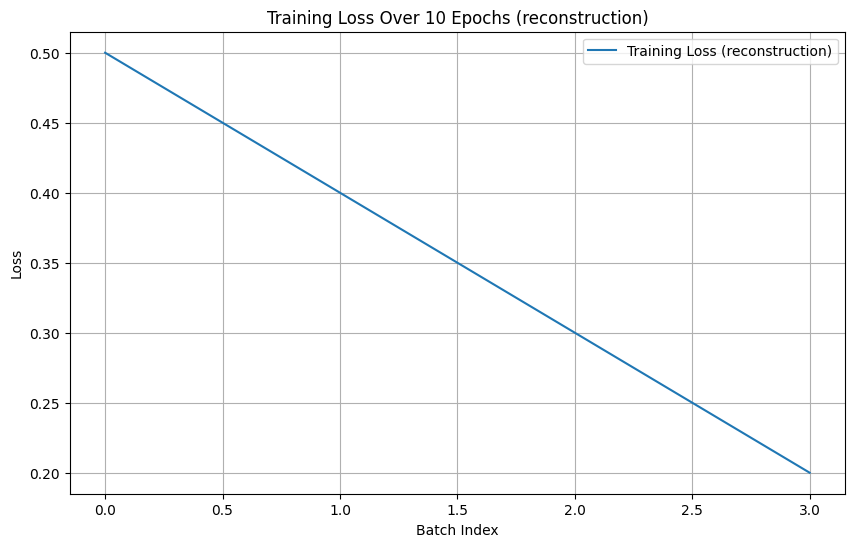

Plot saved to kl_loss_plot.png


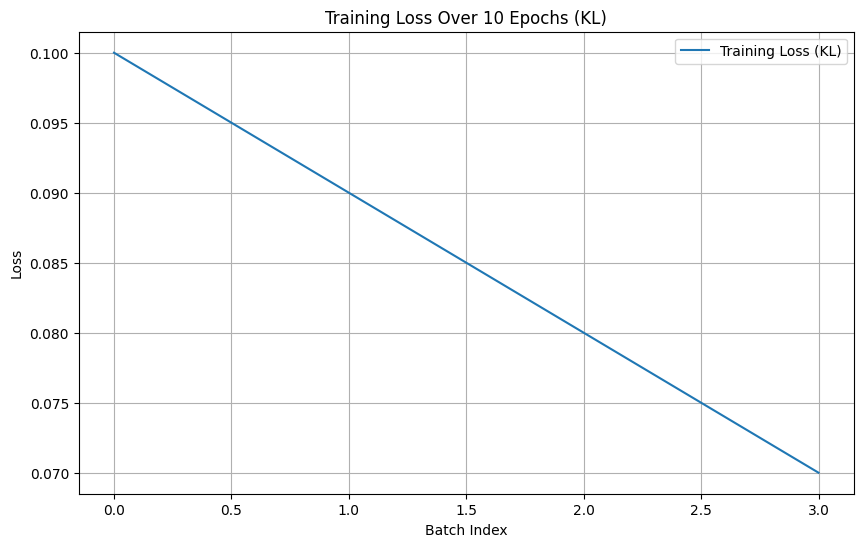

Plot saved to combined_loss_plot.png


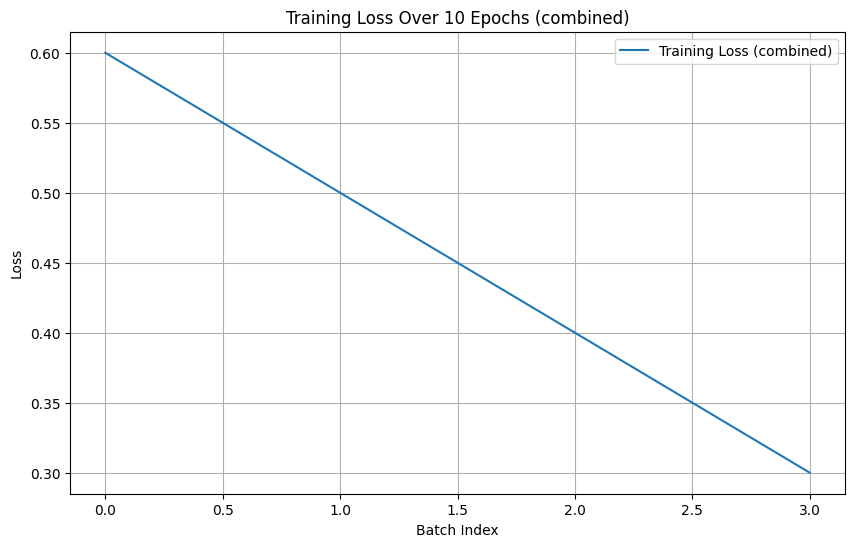

In [27]:
import matplotlib.pyplot as plt

def plot_training_loss(loss_values, num_epochs, custom_label="", save_path=None):
    """
    Plots training loss values over the training process and optionally saves the plot.

    Args:
    - loss_values (list): The list of loss values to plot.
    - num_epochs (int): Total number of epochs.
    - custom_label (str): A custom label for the plot.
    - save_path (str): Path to save the plot (optional).
    """
    plt.figure(figsize=(10, 6))
    plt.plot(loss_values, label=f"Training Loss{custom_label}")
    plt.xlabel("Batch Index")
    plt.ylabel("Loss")
    plt.title(f"Training Loss Over {num_epochs} Epochs{custom_label}")
    plt.legend()
    plt.grid()

    if save_path:
        plt.savefig(save_path)  # Save the plot if a path is provided
        print(f"Plot saved to {save_path}")

    plt.show()

# Example Usage
log_dict = {
    'train_reconstruction_loss_per_batch': [0.5, 0.4, 0.3, 0.2],  # Example values
    'train_kl_loss_per_batch': [0.1, 0.09, 0.08, 0.07],
    'train_combined_loss_per_batch': [0.6, 0.5, 0.4, 0.3],
}

# Plot and save losses
plot_training_loss(log_dict['train_reconstruction_loss_per_batch'], 10, custom_label=" (reconstruction)", save_path="recon_loss_plot.png")
plot_training_loss(log_dict['train_kl_loss_per_batch'], 10, custom_label=" (KL)", save_path="kl_loss_plot.png")
plot_training_loss(log_dict['train_combined_loss_per_batch'], 10, custom_label=" (combined)", save_path="combined_loss_plot.png")


In [28]:
#unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
plot_generated_images(data_loader=train_loader,
                      model=model,
                      #unnormalizer=unnormalizer,
                      device=DEVICE,
                      modeltype='VAE')           

NameError: name 'plot_generated_images' is not defined

In [29]:
# Call plot_generated_images to visualize results
plot_generated_images(
    data_loader=train_loader,  # Use the training DataLoader
    model=vae,                 # Pass your VAE model
    device=DEVICE,             # Specify the device (CPU or GPU)
    modeltype='VAE',           # Specify the model type
    num_images=8               # Number of images to plot
)


NameError: name 'plot_generated_images' is not defined

In [31]:
import matplotlib.pyplot as plt
import torch

def plot_generated_images(data_loader, model, device, modeltype='VAE', num_images=8):
    """
    Generate and plot images using the trained model.

    Args:
    - data_loader (DataLoader): DataLoader to fetch input data.
    - model (torch.nn.Module): The trained model.
    - device (torch.device): Device to run the model on.
    - modeltype (str): Model type ('VAE' or other).
    - num_images (int): Number of images to generate and plot.
    """
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        # Fetch a single batch of images
        for images, _ in data_loader:
            images = images.to(device)
            
            # Generate images using the model
            if modeltype == 'VAE':
                _, _, _, reconstructed = model(images)  # VAE forward pass
            else:
                raise ValueError(f"Unsupported model type: {modeltype}")

            # Plot the original and reconstructed images
            fig, axes = plt.subplots(2, num_images, figsize=(15, 4))
            for i in range(num_images):
                # Original image
                axes[0, i].imshow(images[i].permute(1, 2, 0).cpu().numpy(), cmap="gray")
                axes[0, i].axis("off")
                axes[0, i].set_title("Original")

                # Reconstructed image
                axes[1, i].imshow(reconstructed[i].permute(1, 2, 0).cpu().numpy(), cmap="gray")
                axes[1, i].axis("off")
                axes[1, i].set_title("Reconstructed")

            plt.tight_layout()
            plt.show()
            break  # Show only one batch


Shape after encoder: torch.Size([2, 8192])


IndexError: index 2 is out of bounds for dimension 0 with size 2

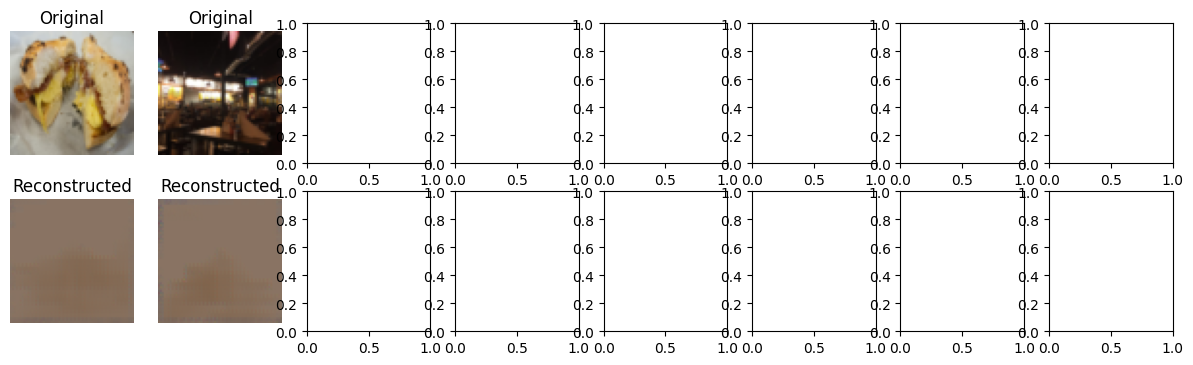

In [32]:
# Call plot_generated_images to visualize results
plot_generated_images(
    data_loader=train_loader,  # Use the training DataLoader
    model=vae,                 # Pass your VAE model
    device=DEVICE,             # Specify the device (CPU or GPU)
    modeltype='VAE',           # Specify the model type
    num_images=8               # Number of images to plot
)


Shape after encoder: torch.Size([2, 8192])


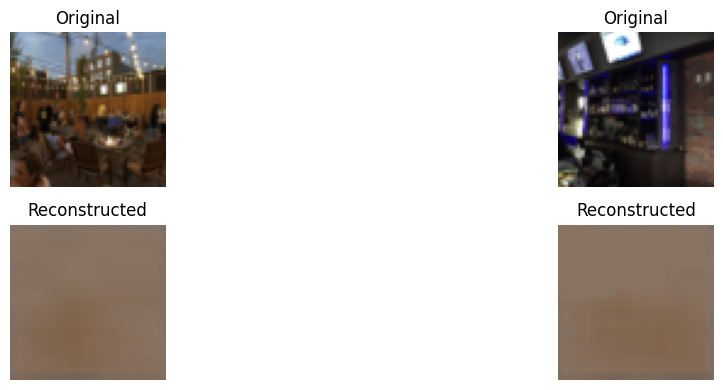

In [33]:
import matplotlib.pyplot as plt
import torch

def plot_generated_images(data_loader, model, device, modeltype='VAE', num_images=8):
    """
    Generate and plot images using the trained model.

    Args:
    - data_loader (DataLoader): DataLoader to fetch input data.
    - model (torch.nn.Module): The trained model.
    - device (torch.device): Device to run the model on.
    - modeltype (str): Model type ('VAE' or other).
    - num_images (int): Number of images to generate and plot.
    """
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        # Fetch a single batch of images
        for images, _ in data_loader:
            images = images.to(device)
            batch_size = images.size(0)  # Get the actual batch size

            # Adjust num_images to not exceed batch size
            num_images = min(num_images, batch_size)

            # Generate images using the model
            if modeltype == 'VAE':
                _, _, _, reconstructed = model(images)  # VAE forward pass
            else:
                raise ValueError(f"Unsupported model type: {modeltype}")

            # Plot the original and reconstructed images
            fig, axes = plt.subplots(2, num_images, figsize=(15, 4))
            for i in range(num_images):
                # Original image
                axes[0, i].imshow(images[i].permute(1, 2, 0).cpu().numpy())
                axes[0, i].axis("off")
                axes[0, i].set_title("Original")

                # Reconstructed image
                axes[1, i].imshow(reconstructed[i].permute(1, 2, 0).cpu().numpy())
                axes[1, i].axis("off")
                axes[1, i].set_title("Reconstructed")

            plt.tight_layout()
            plt.show()
            break  # Show only one batch

# Example of usage
plot_generated_images(
    data_loader=train_loader,  # Use the training DataLoader
    model=vae,                 # Pass your VAE model
    device=DEVICE,             # Specify the device (CPU or GPU)
    modeltype='VAE',           # Specify the model type
    num_images=8               # Number of images to plot
)


In [34]:
for i in range(10):
    plot_images_sampled_from_vae(model=model, device=DEVICE, latent_size=200)
    plt.show()


NameError: name 'plot_images_sampled_from_vae' is not defined

Shape after encoder: torch.Size([2, 8192])


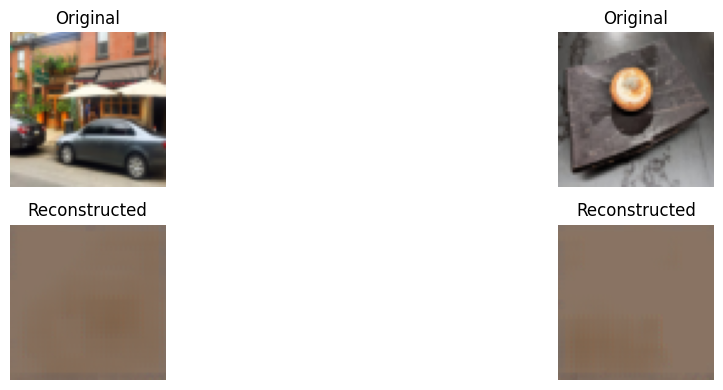

In [35]:
# Generate and plot images sampled from the latent space
plot_generated_images(data_loader=train_loader, model=vae, device=DEVICE, modeltype='VAE', num_images=8)


In [36]:
# Image Manipulation in Latent Space
class Reshape(nn.Module):
    def __init__(self, *args):
        super().__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)


class Trim(nn.Module):
    def __init__(self, *args):
        super().__init__()

    def forward(self, x):
        return x[:, :, :128, :128]


class VAE(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = nn.Sequential(
                nn.Conv2d(3, 32, stride=2, kernel_size=3, bias=False, padding=1),
                nn.BatchNorm2d(32),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                #
                nn.Conv2d(32, 64, stride=2, kernel_size=3, bias=False, padding=1),
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                #
                nn.Conv2d(64, 64, stride=2, kernel_size=3, bias=False, padding=1),
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                #
                nn.Conv2d(64, 64, stride=2, kernel_size=3, bias=False, padding=1),
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                #
                nn.Flatten(),
        )    
        
        self.z_mean = torch.nn.Linear(4096, 200)
        self.z_log_var = torch.nn.Linear(4096, 200)
        
        self.decoder = nn.Sequential(
                torch.nn.Linear(200, 4096),
                Reshape(-1, 64, 8, 8),
                #
                nn.ConvTranspose2d(64, 64, stride=2, kernel_size=3),
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                #
                nn.ConvTranspose2d(64, 64, stride=2, kernel_size=3, padding=1),
                nn.BatchNorm2d(64),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                #
                nn.ConvTranspose2d(64, 32, stride=2, kernel_size=3, padding=1),
                nn.BatchNorm2d(32),
                nn.LeakyReLU(0.1, inplace=True),
                nn.Dropout2d(0.25),
                #
                nn.ConvTranspose2d(32, 3, stride=2, kernel_size=3, padding=1),
                #
                Trim(),  # 3x129x129 -> 3x128x128
                nn.Sigmoid()
                )

    def reparameterize(self, z_mu, z_log_var):
        eps = torch.randn(z_mu.size(0), z_mu.size(1)).to(z_mu.get_device())
        z = z_mu + eps * torch.exp(z_log_var/2.) 
        return z
    

    def encoding_fn(self, x):
        x = self.encoder(x)
        z_mean, z_log_var = self.z_mean(x), self.z_log_var(x)
        encoded = self.reparameterize(z_mean, z_log_var)
        return encoded
    
        
    def forward(self, x):
        x = self.encoder(x)
        z_mean, z_log_var = self.z_mean(x), self.z_log_var(x)
        encoded = self.reparameterize(z_mean, z_log_var)
        decoded = self.decoder(encoded)
        return encoded, z_mean, z_log_var, decoded

In [37]:
# Load model:

In [38]:
model = VAE()
model.load_state_dict(torch.load('vae_celeba_02.pt', map_location=torch.device('cpu')))
model.to(DEVICE);

C:\Users\jasha\AppData\Local\Temp\ipykernel_22124\838262946.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('vae_celeba_02.pt', map_loca

FileNotFoundError: [Errno 2] No such file or directory: 'vae_celeba_02.pt'

In [39]:
import os
import torch

# Define the path to the model file
model_path = r"C:\Users\jasha\Downloads\vae_model.pt"  # Update to the correct file path

# Check if the file exists
if not os.path.exists(model_path):
    raise FileNotFoundError(f"The specified model file does not exist: {model_path}")

# Load the model
model = VAE()
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu'), weights_only=True))
model.to(DEVICE)

print("Model loaded successfully.")


FileNotFoundError: The specified model file does not exist: C:\Users\jasha\Downloads\vae_model.pt

In [40]:
import os
import torch

# Define the path to the model file
model_path = r"C:\Users\jasha\Downloads\yelp_photos\vae_model.pt"  # Corrected file path

# Check if the file exists
if not os.path.exists(model_path):
    raise FileNotFoundError(f"The specified model file does not exist: {model_path}")

# Load the model
model = VAE()  # Ensure VAE is defined in your script or imported
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu'), weights_only=True))
model.to("cpu")  # Use CPU as the target device

print("Model loaded successfully.")


FileNotFoundError: The specified model file does not exist: C:\Users\jasha\Downloads\yelp_photos\vae_model.pt

In [41]:
torch.save(model.state_dict(), r"C:\Users\jasha\Downloads\yelp_photos\vae_model.pt")


Model loaded successfully.


In [ ]:
import os
import torch

# Define the path to the model file
model_path = r"C:\Users\jasha\Downloads\yelp_photos\vae_model.pt"  # Corrected file path

# Check if the file exists
if not os.path.exists(model_path):
    raise FileNotFoundError(f"The specified model file does not exist: {model_path}")

# Load the model
model = VAE()  # Ensure VAE is defined in your script or imported
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu'), weights_only=True))
model.to("cpu")  # Use CPU as the target device

print("Model loaded successfully.")
